 **ANALISIS DATA PENJUALAN SEPEDA MOTOR BEKAS**

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
file = "/content/drive/MyDrive/AVD/BIKE DETAILS.csv"
df = pd.read_csv(file)

df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


# **Business Understanding**

## **Business Objective**


Dataset ini berisi tentang penjualan sepeda motor bekas pakai, terdapat informasi seperti nama jenis motor, harga jual, tahun dibeli, status kepemilikan, kilometer yang sudah ditempuh dan harga penjualan di *showroom* awal beli. Tujuan dilakukannya analisis dari data tersbut ialah untuk mengetahui tren harga jual motor bekas dengan melihat informasi dari kilometer dan tahun pembelian. Selain dari itu, pembeli dapat membandingkan harga sekarang dengan harga dari *showroom* sebelumnya.

## **Assess Situation**


Dataset ini memiliki banyak tantangan, mulai dari banyaknya data yang kurang di bagian *ex_showroom_price* yang menyebabkan sulitnya dilakukan perbandingan harga, selain itu terdapat juga penduplikasian data yang terjadi hingga terdapatnya informasi tentang rentang tahun yang sangat jauh menyebabkan tren harga ikut berubah jauh. Selain hal hal tersebut terdapat juga ketidak konsistenan penulisan di bagian *km_driven* yang kurang masuk akal.

## **Analytic Goals & Project Plan**


Analisis yang dilakukan untuk mengatasi tantangan tangtangan diatas adalah dengan:

*   Menganalisis hubungan antara harga jual dan tahun produksi dengan tujuan untuk mengetahui apakah motor yang keluaran terberu akan lebih mahal atau tidak
*   Melakukan perbandingan harga jual dengan harga penjual dari *showroom*
*   Mengidentifikasi data yang memiliki kekurangan informasi dan terdapat duplikasi agar analisis menjadi lebih akurat
*   Segmentasi berdasarkan merek atau model motor populer



Rencana yang sudah disiapkan berupa:

*   Memahami data dengan mengecek struktur dataset dan mengidentifikasi hilangnya informasi dan duplikasi yang terjadi
*   Mengolah data dengan menghapus data yang terduplikasi dan memperbaiki kesalahan pada penulisan di kilometer jarak tempuh agar konsisten
*   Melakukan eksplorasi data lebih mendalam dan juga analisis segmentasi untuk motor yang bermerek dan bermodel populer yang sedang tren saat ini
*   Membuat *insight* atau kesimpulan dengan menyimpulkan faktor faktor yang memengaruhi harga jual motor bekas dan memberikan rekomendasi kepada pembeli untuk tau kapan waktu yang tepat dalam membeli motor bekas.

## **Struktu Data**

### **Informasi Dasar**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


Berdasarkan data di atas, dapat diketahui bahwa dataset ini memiliki 1061 Baris dan 7 Kolom, selain itu terdapat juga 1 tipe data float, 3 tipe data integer, dan 3 tipe data object.

### **Informasi Lanjutan**

1. name: 0
        Jumlah baris: 1061
        Tipe data: object
        Deskripsi: Kolom nama motor, mencakup merek dan model

2. Selling Price: 1
        Jumlah baris: 1061
        Tipe data: int64
        Deskripsi: Harga penjualan motor bekas

3. Year: 2
        Jumlah baris: 1061
        Tipe data: int64
        Deskripsi: Tahun motornya dibeli oleh pemilik sebelumnya

4. Seller Type: 3
        Jumlah baris: 1061
        Tipe data: object
        Deskripsi: tipe penjual (dealer atau individual)

5. Owner: 4
        Jumlah baris: 1061
        Tipe data: object
        Deskripsi: Status kepemilikan motor (pemilik pertama, kedua dan seterusnya)

6. Km Driven: 5
        Jumlah baris: 1061
        Tipe data: int64
        Deskripsi: Jarak tempuh motor

7. Market: 6
        Jumlah baris: 626
        Tipe data: float64
        Deskripsi: Harga motor pada showroom saat pertama kali dibeli

In [7]:
df.describe(include='all')

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
count,1061,1061.000000,1061.000000,1061,1061,1061.000000,6.260000e+02
unique,279,NaN,NaN,2,4,NaN,NaN
top,Bajaj Pulsar 150,NaN,NaN,Individual,1st owner,NaN,NaN
freq,41,NaN,NaN,1055,924,NaN,NaN
mean,NaN,59638.151744,2013.867107,NaN,NaN,34359.833176,8.795871e+04
std,NaN,56304.291973,4.301191,NaN,NaN,51623.152702,7.749659e+04
min,NaN,5000.000000,1988.000000,NaN,NaN,350.000000,3.049000e+04
25%,NaN,28000.000000,2011.000000,NaN,NaN,13500.000000,5.485200e+04
50%,NaN,45000.000000,2015.000000,NaN,NaN,25000.000000,7.275250e+04
75%,NaN,70000.000000,2017.000000,NaN,NaN,43000.000000,8.703150e+04


1. Count (Kelengkapan Data)
Berdasarkan data, total baris dalam dataset motor bekas adalah 1061 dengan data yang hilang:
* ex_showroom_price memiliki 435 data yang hilang (tersisa 626 data)

Kesimpulan: Hampir semua kolom lengkap kecuali kolom ex_showroom_price yang perlu diperbaiki.



---



2. Mean vs Median (Distribusi Data)

* selling_price
  * Mean = 59.638
  * Median = 45.000

Rata-rata lebih tinggi dari median → ada motor dengan harga sangat mahal (contoh Harley-Davidson, BMW, Kawasaki) yang membuat rata-rata naik.

* year
  * Mean = 2013,87
  * Median = 2015

Median lebih tinggi dari mean → mayoritas motor relatif baru (sekitar 2015–2017), tetapi ada data motor lama (1988–2000) yang menurunkan rata-rata.

* km_driven
  * Mean = 34.359
  * Median = 25.000

Rata-rata lebih tinggi dari median → ada motor dengan jarak tempuh ekstrem (hingga 880.000 km) yang menarik rata-rata ke atas.

* ex_showroom_price
  * Mean = 87.958
  * Median = 72.752

Rata-rata lebih tinggi dari median → motor premium dengan harga showroom sangat tinggi membuat distribusi condong ke kanan.

Kesimpulan: Distribusi data numerik cenderung right-skewed (condong ke kanan), dipengaruhi oleh outlier motor premium dan jarak tempuh ekstrem.




---



3. Min dan Max (Validasi Logika)

* selling_price
  * Min = 5.000
  * Max = 760.000
  * Rentang harga wajar, dari motor murah hingga motor premium.

* year
  * Min = 1988
  * Max = 2020
  * Rentang masuk akal, mencakup motor klasik hingga motor baru.

* km_driven
  * Min = 350 km
  * Max = 880.000 km
  * Nilai maksimum sangat tinggi, perlu validasi apakah benar atau kesalahan input.

* ex_showroom_price
  * Min = 34.900
  * Max = 1.278.000
  * Rentang harga showroom wajar, dari motor entry-level hingga motor premium.

Kesimpulan: Ada beberapa nilai ekstrem (km_driven 880.000 km) yang perlu dicek ulang.




---



4. Standar Deviasi (std) - Variabilitas Data

* selling_price
  * Mean = 59.638
  * Std = 56.304
  * Variasi harga sangat tinggi, hampir setara dengan rata-rata.

* year
  * Mean = 2013,87
  * Std = 4,30
  * Variasi tahun produksi relatif kecil, mayoritas motor dalam rentang 2010–2020.

* km_driven
  * Mean = 34.359
  * Std = 51.623
  * Variasi jarak tempuh sangat besar, dari motor baru hingga motor dengan penggunaan ekstrem.

* ex_showroom_price
  * Mean = 87.958
  * Std = 77.495
  * Variasi harga showroom tinggi, menunjukkan perbedaan besar antara motor entry-level dan premium.


Kesimpulan:

* Variabilitas tinggi pada selling_price, km_driven, dan ex_showroom_price menunjukkan dataset mencakup motor dengan kondisi dan segmen pasar yang sangat beragam.

## **Verifikasi Kualitas Data**

### **Cek Data Setiap Kolom**

Kita akan mengecek tipe data dari setiap kolom apakah sudah sesuai atau tidak. Agar insight serta visualisasi yang akan kita buat menjadi akurat.

Dan dapat dilihat dibawah ini, kolom selling price dengan tipe data integer, seharusnya kolom ini bertipe data kan float. Selain itu, semua kolom sudah sesuai.

In [8]:
df.dtypes

,0
name,object
selling_price,int64
year,int64
seller_type,object
owner,object
km_driven,int64
ex_showroom_price,float64


### **Incosistent Values**

Pada tahap ini, saya melakukan mengecek kekonsistenan data, contoh nya dalam penulisan. Hal ini dilakukan agar data tidak terduplikat dengan baris yang sebenarnya sama akan tetapi bisa terduplikat karena tidak konsisten.

In [11]:
print(df['year'].unique())

[2019 2017 2018 2015 2011 2010 2008 2016 2020 2012 2006 2013 2009 2014
 2004 2007 2000 2002 2005 1997 2001 1988 1999 1998 1991 2003 1993 1995]


Ada motor dengan tahun produksi sangat lama (1988, 1997, 2000) bercampur dengan motor baru (2019–2020). Secara logis masih mungkin, tapi perlu validasi apakah data lama memang relevan.

In [12]:
print(df['km_driven'].unique())

[   350   5650  12000  23000  21000  60000  17000  39000  32000  42000
  10000  21178   1127   1700  55000  27000  45000  17450  20696   2000
  20000  35000  15210  24000   2500  75000  50000   6502  16000  13000
  12800   4600  81000   8000  57000  26000  29000  43000  40000   3000
  80000  30000  41000   8150   1933  55750  15856   3700  21938  48000
  54000  15000   3500   9000  38000  22000   9432  70000 500000  30514
 130000  25000  22770   6330    500  43400   7004  16500  12500   9600
  11000   7500 120000   6465  18803   7000   6100  14000  85000  18000
   1500  90000  36500  49000   8500   3775  14500   4000  99000  52000
   2300  36000  71000  15888   5600  19612  33700 100000   6000  46000
  72000  67000  15500  60855  37714  34601  44000  17500   6500   2200
  66191  32800   3900  46782  51000  66000  23500  33000  70350   2700
  41311  65000  34000   1200  19000   8600   7200  31195   1000  77592
   7600  14965   2380  13600  18600   7750   2800   9800  29689  28243
  2230

Ada nilai ekstrem seperti 500.000 km dan 880.000 km, yang tidak realistis untuk motor. Bisa jadi kesalahan input.


Untuk data pada kolom sisanya tidak terdapat ketidak konsistenan. Karena dataset yang dimasukan tidak mengandung kesalahan penulisan kata maupun huruf.

### **Missing Velues**

In [14]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
name,0.000000
selling_price,0.000000
year,0.000000
seller_type,0.000000
owner,0.000000
km_driven,0.000000
ex_showroom_price,40.999057


Pada tahap ini, kita akan melihat seberapa banyak data yang hilang pada seluruh kolom. Dan terlihat bahwa kolom:
* Ex Showroom Price

Memiliki missing values sekitar 40%, sesuai dengan informasi data yang sudah ditulis yaitu sekitar 435 data hilang dalam bagian tersebut. Maka akan dilakukan analisis lebih lanjut dan untuk memperbaiki data yang hilang.

### **Duplicated Values**

Pada tahap ini, kita akan mengecek duplikasi pada dataset. Hal ini dilakukan agar dataset memiliki insight dan hasil yang bersih.

In [21]:
df[df.duplicated()]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
231,TVS Apache RTR 200 4V,95000,2018,Individual,1st owner,9600,NaN
508,Bajaj Pulsar 135 LS,20000,2010,Individual,1st owner,80000,64589.0
522,Bajaj Platina 100,20000,2012,Individual,1st owner,16295,NaN
605,Hero Karizma [2003-2014],50000,2013,Individual,1st owner,38000,85766.0
607,Honda CB Hornet 160R,70000,2017,Individual,1st owner,35000,87719.0
773,Honda Activa [2000-2015],23000,2009,Individual,1st owner,95000,50267.0


Bagian hasil menunjukkan adanya baris duplikat dalam dataset. Contoh yang muncul adalah TVS Apache RTR 200 4V, Bajaj Pulsar 135 LS, Bajaj Platina 100, Hero Karizma [2003-2014], Honda CB Hornet 160R, dan Honda Activa [2000-2015].  

Hal tersebut bisa terjadi karena data ganda yang masuk lebih dari sekali, kesalahan input, atau memang ada motor berbeda dengan spesifikasi identik sehingga terlihat sama.  

Langkah yang disarankan adalah melakukan pembersihan data dengan menghapus duplikat menggunakan fungsi seperti df = drop_duplicates(), atau memverifikasi terlebih dahulu apakah duplikat tersebut merupakan benar-benar motor yang sama atau hanya kebetulan identik.


### **Outliers Velues**

In [22]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
selling_price,8.199811
year,1.696513
km_driven,3.675778
ex_showroom_price,6.880302


Pada tahap ini, kita akan melihat nilai ekstrem (outliers) pada kolom yang bertipe data kan numerik. Hal ini dilakukan agar mendapatkan insight yang akurat sehingga dapat memperkuat analisis dan model yang akan kita bangun nantinya.

Akan tetapi memang tidak semua kolom perlu kita tangani, kita harus tetap melihat dan memahami tujuan dari setiap kolom yang ada di dataset.

Dan terlihat kolom
* selling_price (8,19%) → Persentase outlier cukup tinggi. Ini menunjukkan ada banyak motor dengan harga jauh di luar pola umum, baik sangat murah maupun sangat mahal. Hal ini bisa memengaruhi analisis harga rata-rata.

* year (1,69%) → Outlier relatif kecil. Artinya hanya sedikit motor dengan tahun produksi yang sangat tua atau sangat baru dibanding mayoritas data.

* km_driven (3,67%) → Ada sejumlah motor dengan jarak tempuh ekstrem. Persentase ini cukup signifikan karena bisa memengaruhi distribusi kondisi kendaraan.

* ex_showroom_price (6,88%) → Outlier cukup tinggi. Ini menandakan adanya motor premium dengan harga showroom jauh lebih tinggi dibanding mayoritas motor lain.


Kesimpulan: Outlier paling dominan ada di selling_price dan ex_showroom_price, yang menunjukkan variasi besar antara motor entry-level dan motor premium. Outlier di km_driven juga penting karena bisa menandakan data input ekstrem. Sedangkan outlier di year relatif kecil sehingga tidak terlalu mengganggu distribusi.

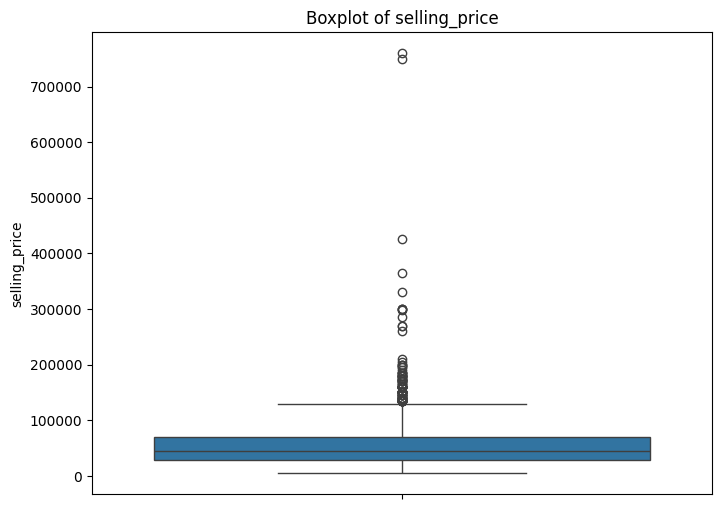

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['selling_price'])
plt.title('Boxplot of selling_price')
plt.ylabel('selling_price')
plt.show()

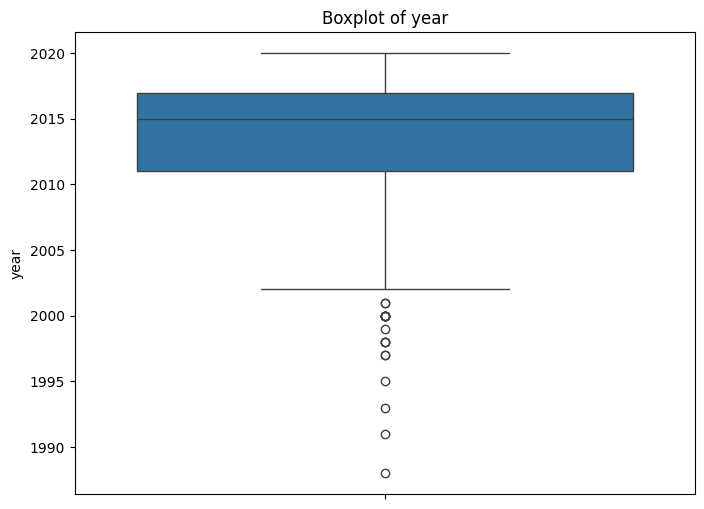

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['year'])
plt.title('Boxplot of year')
plt.ylabel('year')
plt.show()

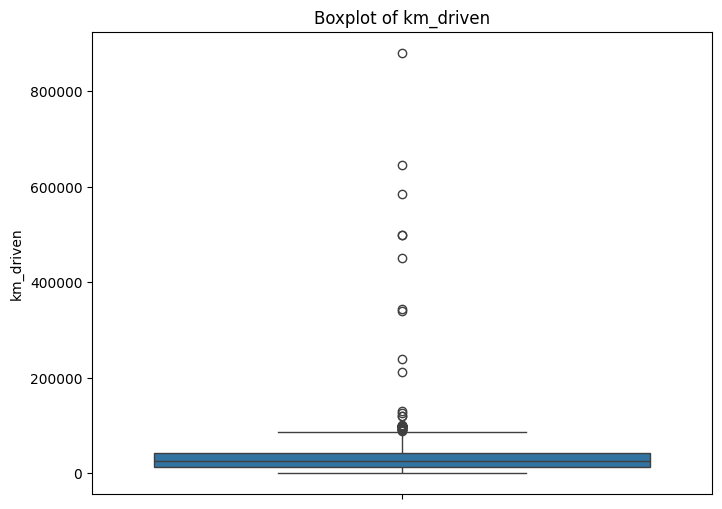

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['km_driven'])
plt.title('Boxplot of km_driven')
plt.ylabel('km_driven')
plt.show()

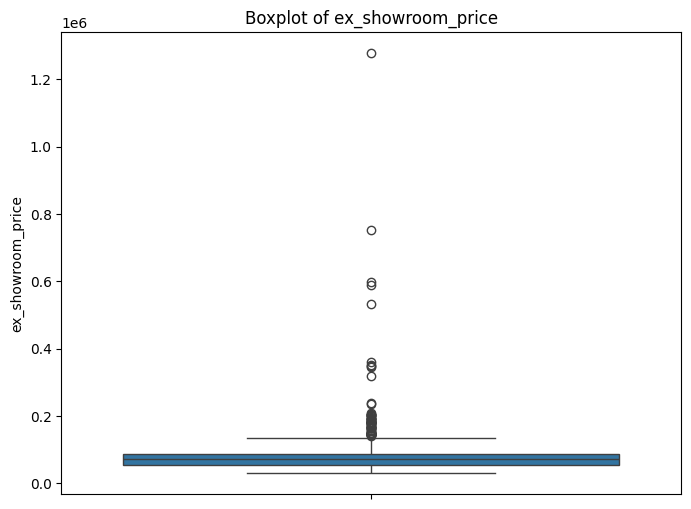

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['ex_showroom_price'])
plt.title('Boxplot of ex_showroom_price')
plt.ylabel('ex_showroom_price')
plt.show()

# **Eksplorasi Data (EDA)**

## **Comparison(Perbandingan)**

Aktivitas: Membandingkan pemilik (owner) dengan harga jual (selling_price).

Tujuan: Mengetahui penjelasan karena Motor dengan owner pertama umumnya memiliki harga lebih tinggi dibanding motor dengan kepemilikan kedua atau ketiga.


Visualisasi: Bar Chart (Grafik Batang).

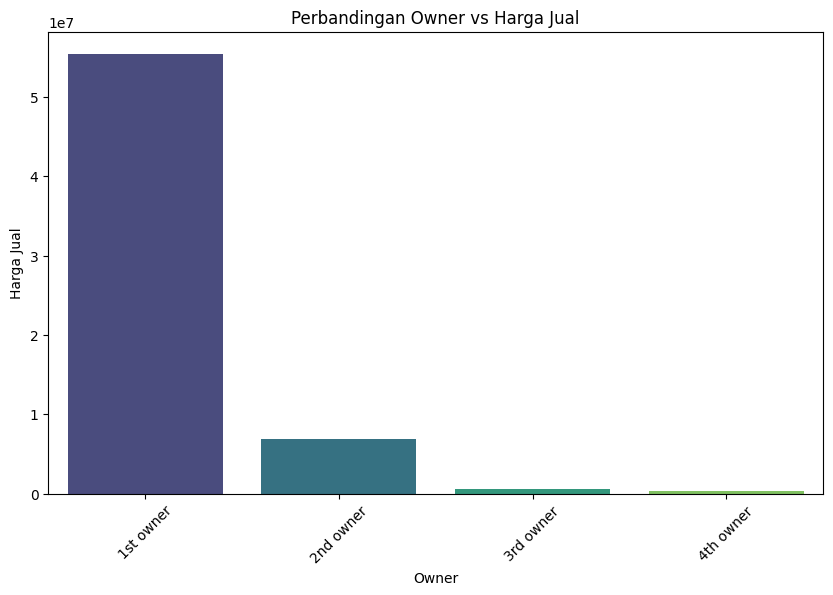

In [32]:
harga = df.groupby('owner')['selling_price'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=harga.index, y=harga.values, palette='viridis', hue=harga.index, legend=False)
plt.title('Perbandingan Owner vs Harga Jual')
plt.xlabel('Owner')
plt.ylabel('Harga Jual')
plt.xticks(rotation=45)
plt.show()

Grafik batang yang ditampilkan memperlihatkan perbandingan total harga jual motor berdasarkan status kepemilikan.

Motor dengan 1st owner memiliki total harga jual yang jauh lebih tinggi dibandingkan kategori lainnya. Hal ini menunjukkan bahwa motor yang masih dimiliki oleh pemilik pertama cenderung lebih bernilai dan lebih diminati di pasar.

Sementara itu, motor dengan 2nd owner, 3rd owner, dan 4th owner memiliki total harga jual yang lebih rendah. Pola ini menegaskan bahwa semakin banyak pergantian kepemilikan, nilai jual motor cenderung menurun.

Sehingga riwayat kepemilikan berpengaruh signifikan terhadap harga jual, dengan kepemilikan pertama menjadi faktor yang paling kuat dalam menjaga nilai kendaraan.


## **Composition(Komposisi)**

Aktivitas: Melihat proporsi atau persentase pemilik yang sudah memakai motor bekas (owner).

Tujuan: Mengetahui dan memahami pengaruh riwayat kepemilikan terhadap nilai jual motor

Visualisasi: Pie Chart (Grafik Lingkaran).

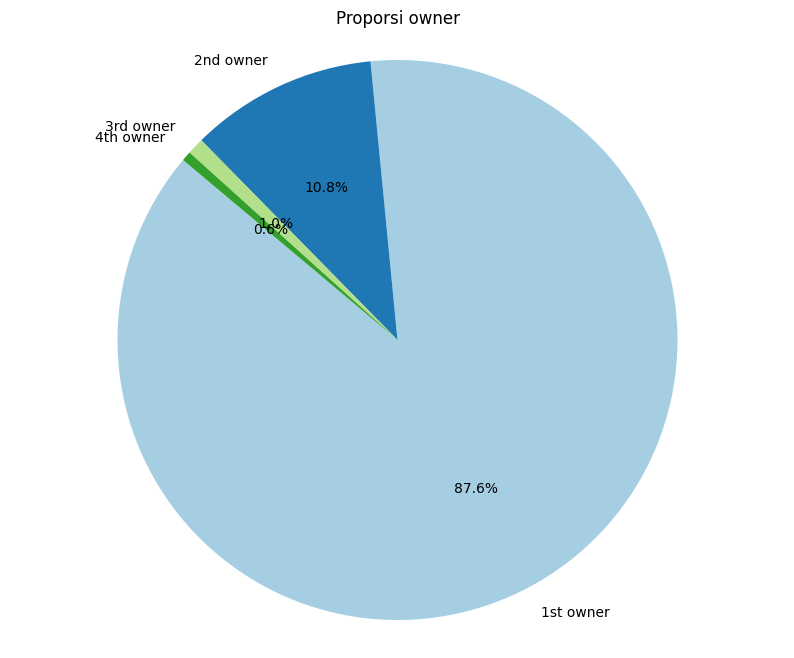

In [34]:
owner = df.groupby('owner')['selling_price'].sum().sort_values(ascending=False)
owner = owner.head(4)

plt.figure(figsize=(10, 8))
owner.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proporsi owner')
plt.ylabel('')
plt.axis('equal')
plt.show()

Menunjukkan bahwa mayoritas motor dalam dataset berasal dari 1st owner dengan persentase sekitar 87,6%. Hal ini menegaskan bahwa sebagian besar motor yang dijual masih dimiliki oleh pemilik pertama.

Kategori 2nd owner menempati posisi kedua dengan 10,8%, sementara 3rd owner dan 4th owner hanya menyumbang kurang dari 2% secara keseluruhan.

Riwayat kepemilikan sangat memengaruhi nilai jual motor. Motor dengan kepemilikan pertama lebih dominan di pasar dan cenderung memiliki harga jual lebih tinggi, sedangkan motor dengan kepemilikan lebih dari satu relatif jarang dan nilainya lebih rendah.

## **Distribution(Distribusi)**

Aktivitas: Menganalisis penyebaran nilai harga showroom motor pada kolom (ex_showroom_price).

Tujuan: Mengetahui apakah mayoritas motor berada di kisaran harga rendah-menengah atau tinggi, serta mendeteksi adanya kecondongan (skewness) akibat motor premium.

Visualisasi: Histogram.

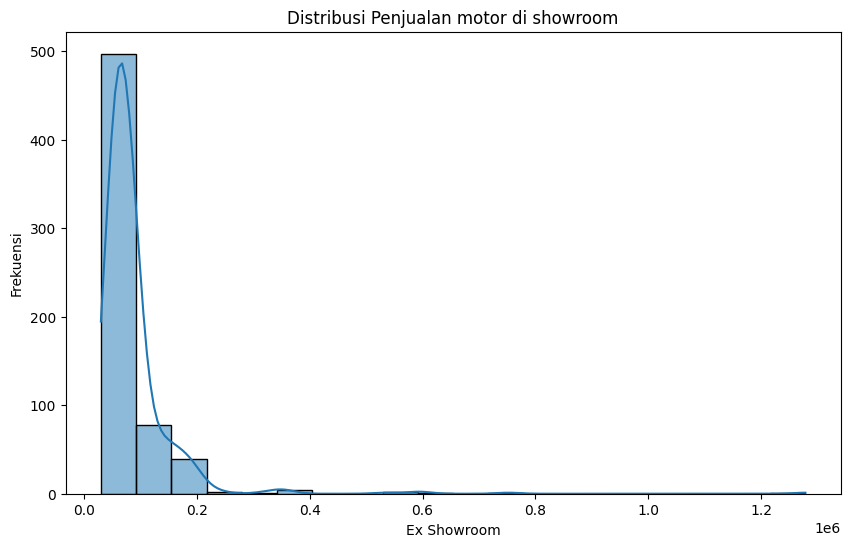

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ex_showroom_price'], bins=20, kde=True)
plt.title('Distribusi Penjualan motor di showroom')
plt.xlabel('Ex Showroom')
plt.ylabel('Frekuensi')
plt.show()

Distribusi ex_showroom_price menunjukkan bahwa mayoritas motor berada di kisaran harga rendah hingga menengah, dengan konsentrasi data di bawah 100.000. Garis KDE memperlihatkan puncak distribusi yang jelas di area tersebut.

Namun, distribusi terlihat right-skewed (condong ke kanan). Hal ini terjadi karena adanya motor premium dengan harga showroom jauh lebih tinggi, yang mendorong nilai maksimum hingga lebih dari 1.200.000.

Pasar motor didominasi oleh segmen entry-level dan menengah, sementara motor premium hanya sedikit tetapi cukup memengaruhi bentuk distribusi secara keseluruhan. Ini penting untuk analisis harga karena outlier dari motor premium dapat menggeser rata-rata dan membuat distribusi terlihat tidak seimbang.


## **Relationship(Hubungan)**

Aktivitas: Menganalisis hubungan antara harga jual motor bekas (selling_price) dengan harga showroom (ex_showroom_price).

Tujuan: Melihat apakah motor dengan harga showroom tinggi tetap memiliki harga jual tinggi meskipun sudah bekas.

Visualisasi: Heatmap

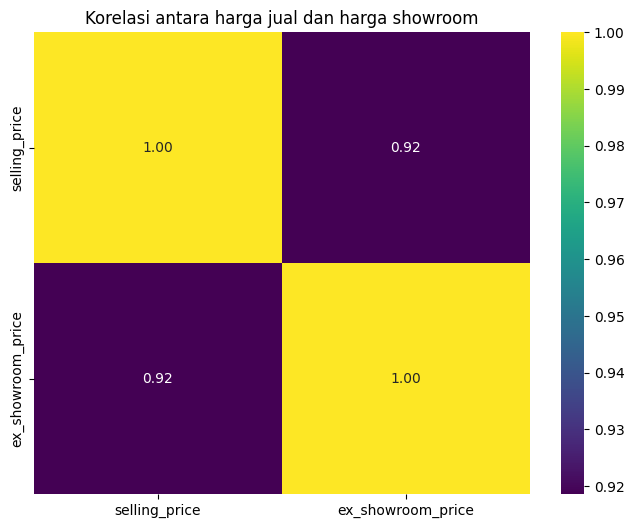

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=df[['selling_price', 'ex_showroom_price']].corr(),
            annot=True,
            cmap='viridis',
            fmt='.2f')
plt.title('Korelasi antara harga jual dan harga showroom')
plt.show()

Heatmap korelasi antara selling_price dan ex_showroom_price menunjukkan adanya hubungan yang sangat kuat dengan nilai korelasi sebesar (0,92).

Hal ini berarti motor dengan harga showroom tinggi cenderung tetap memiliki harga jual tinggi meskipun sudah bekas. Korelasi yang kuat ini menegaskan bahwa harga showroom merupakan salah satu faktor utama yang memengaruhi nilai jual motor di pasar second-hand.

Harga showroom dapat dijadikan indikator penting dalam memprediksi harga jual motor bekas. Motor premium dengan showroom price tinggi akan tetap mempertahankan nilai jual lebih baik dibanding motor entry-level, meskipun terjadi depresiasi karena penggunaan.

## **Menyimpan Dataset**

In [37]:
df.to_csv('[Bersih]DETAILS.csv', index=False)